# "What are the trends of ghg emissions in the UK within each sector over time?"

Greenhouse Gas Emissions 

Hareem Nadeem (z54425310)

`imports`

In [2]:
import os
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import numpy as np # linear algebra
import json
import topojson
import pandas as pd # data processing (CSV file - e.g. pd.read_csv)
from datetime import datetime


In [3]:
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = (50, 30)

In [5]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [6]:
#Loading my data (excel spreadsheet)
if os.path.isfile("ghg_data.csv"):
    filepath = "ghg_data.csv"
    print("Loading from file")
else:
    filepath = "https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1087005/uk-local-authority-ghg-emissions-2020-dataset.csv"
    print("loading from the internet")

gd = pd.read_csv(filepath)
print("'Greenhouse Gas Emissions dataset, loaded")

Loading from file
'Greenhouse Gas Emissions dataset, loaded


`What are the trends of C02e in the UK within each sector over time?`

Data set: “UK Local and regional greenhouse gas emissions (2005 to 2020) from data.gov.uk

Published by: Department for Business, Energy, and industrial strategy on 30 June 2022


The dataset explores the breakdown of greenhouse gas emissions and carbon dioxide emissions locally and regionally in the UK from 2005 to 2020. The estimations within this set is useful for relevant organisations to record and identify high emitting sources of carbon dioxide and energy intensive sectors, changes in carbon dioxide emissions over time and overall designing strategies to reduce carbon emissions. Carbon dioxide is naturally present within the atmosphere inside the earth’s carbon cycle. Sectors such as agriculture practices, electricity, LULUCF, transportation, and waste management contribute to the carbon emissions altering the carbon cycle and affecting the ability for plants and soil to remove and store c02 from the atmosphere. 

Greenhouse gas and carbon dioxide emissions are largely responsible for the increasing global temperature due to both natural and anthropogenic activities, the alarming rate of climate change is primarily influenced by these sectors. Through this data project, I presented the trends and data changes throughout the years of territorial c02 emissions by sector to identify the key sources of C02 emissions in each area; allowing changes in C02 emissions over time to be monitored from 2005 to 2020, describing the major sources of emissions growth, stability and decline in the UK.


In [6]:
gd.head(10)

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2e),Mid-year Population (thousands),Area (km2)
0,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,CH4,0.010737,0.000000,236.47,78.0311
1,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,CO2,0.380289,0.380289,236.47,78.0311
2,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,N2O,0.001710,0.000000,236.47,78.0311
3,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,CH4,0.021121,0.000000,236.47,78.0311
4,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,CO2,0.700438,0.700438,236.47,78.0311
5,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,N2O,0.000558,0.000000,236.47,78.0311
6,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture 'Other',CH4,0.003186,0.000000,236.47,78.0311
7,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture 'Other',CO2,0.792025,0.792025,236.47,78.0311
8,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture 'Other',N2O,0.009533,0.000000,236.47,78.0311
9,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Soils,CO2,0.125285,0.000000,236.47,78.0311


In [76]:
gd.columns

Index(['Country', 'Country Code', 'Region', 'Region Code',
       'Second Tier Authority', 'Local Authority', 'Local Authority Code',
       'Calendar Year', 'LA GHG Sector', 'LA GHG Sub-sector', 'Greenhouse gas',
       'Territorial emissions (kt CO2e)',
       'CO2 emissions within the scope of influence of LAs (kt CO2e)',
       'Mid-year Population (thousands)', 'Area (km2)'],
      dtype='object')

Within this dataset, there are 15 columns and 467444 rows

-----


`Column(s) Name: Country & Region `

United Kingdom consists of 3 main regions, England, Scotland, Northern Ireland and Wales. This dataset explores the evaluation of greenhouse gas emissions and its changes in these regions, which territories contribute to more ghg emissions and its trends.

The country and regional columns are both categorical values, every other column is dependent on this variable, it helps differentiate the dataset by each region in the country. 

In [ ]:
with open('Regions_(December_2017)_Boundaries.geojson') as file:
    uk = json.load(file)

The regions were explored by creating choropleth and base maps, these calculated the amount of carbon dioxide equivalents produced in each territory.

In [ ]:
gd['Country'].value_counts()

In [ ]:
print("Region within Countries")
gd.groupby(['Country', 'Region']).size().unstack().plot(kind='bar', stacked=False, )

During the timeline, the top carbon dioxide emitters in UK, was England, emitting about 385869 thousands, and the lowest was Northern Ireland, only producing 13319 thousands.These territorial emissions are going to be explored further in the column 'Territorial emissions'

In [ ]:
fig = go.Figure(go.Choroplethmapbox(geojson=uk,locations=gd.Country.astype('str'),z=gd['Territorial emissions (kt CO2e)'].astype('int').astype('str'),
                                    colorscale='Cividis',zmin=-2920.785256,zmax= 9497.777472,
                                    marker_opacity=0.5, marker_line_width=0))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3, mapbox_center = {"lat": 55.2970314, "lon": -1.72889996})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
from IPython.display import Image
with open('choropleth-region captures.gif','rb') as file:
    display(Image(file.read()))
    print("Figure 3: 2005-2020 CO2e emissions by region and country")

Regionally, the United Kingdom emissions have varied by province, local and regional authority. Figure 3 displays a choropleth map, showing the rate of CO2e emissions per kilo tonne by each region anually. The animation was created by creating a base map and capturing each frame from the timeline 2005 to 2020. The darker green regions represent a large source of emissions and lighter green colours represent less co2e emissions. Northern Ireland's region emitted less production,however, had the highest LULUCF and domestic emissions per capita. The trend over the years remained constant, accounting for 1.1 kt per capita.
London had the highest CO2 per capita emissions of any region represented by dark hues, due to the urban nature of transport system, high population density and large industrial facilities than any other region. Specifically, in 2018, UK was at its peak, rating the highest amount of co2e emissions yet with 30419 kilo tonnes produced.


`Territorial Emissions (measured in kilo tonnes of carbon dioxide equivalents)`

In [ ]:
xe=gd
fig= plt.figure(figsize=(12,5))
sns.lineplot(x='Calendar Year',y='Territorial emissions (kt CO2e)', hue='Country',data=xe)
plt.title('Territorial Emissions per region (UK)')
plt.grid()
plt.show()

During the timeline, the greenhouse gas emissions in the UK shows a gradual increase. The sequential increase shows the changes of emissions from 2005 to 2020, with 2018 being the highest amount of emissions with  30419 Kilo tonnes of Carbon dioxide emissions and 2011 being the lowest amount of emissions with 28852 kilo tonnes of Carbon dioxide emissions.


In [ ]:
#Finding Max, min, median, mode, mean values

maxClm = gd['Territorial emissions (kt CO2e)'].max()
minClm = gd['Territorial emissions (kt CO2e)'].min()
medClm = gd['Territorial emissions (kt CO2e)'].median()
modeclm = gd['Territorial emissions (kt CO2e)'].mode()
meanclm = gd['Territorial emissions (kt CO2e)'].mean()
#printing values 

print('\n',"Maximum Value in Column =", maxClm,'\n',
"Minimum Value in Column =", minClm,'\n',
"Median Value in Column =",medClm, '\n',
"Mean Value in Column =",meanclm, '\n',
"Mode Value in Column =",modeclm)

`Calendar Year`

The timeline for this analysis is from 2005 to 2020. The continuous values recorded within these years records the changes in the production of CO2e emissions. 

In [7]:
#Number of values for each year
co2et = gd[gd['Calendar Year']<=2020]
co2et.groupby('Calendar Year')['CO2 emissions within the scope of influence of LAs (kt CO2e)'].count()

Calendar Year
2005    29111
2006    29157
2007    29130
2008    29134
2009    28859
2010    28857
2011    28852
2012    28857
2013    28877
2014    28891
2015    28900
2016    28908
2017    28909
2018    30419
2019    30407
2020    30175
Name: CO2 emissions within the scope of influence of LAs (kt CO2e), dtype: int64

`Greenhouse gas`

What are greenhouse gases?

Greenhouse gases (GHG) are gases in the atmosphere, absorbing and reemitting heat, causing the greenhouse effect on Earth. Without the greenhouse effect, temperature and life on earth would be colder. So, what if the concentration of gases are too high?


Text(0.5, 1.0, 'Earth')

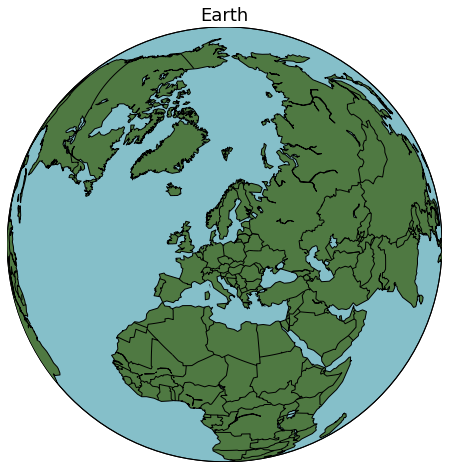

In [77]:
earth = plt.figure(figsize = (20,8))
e = Basemap(projection='ortho', lon_0 = 15, lat_0 = 54)
e.drawcoastlines()
e.fillcontinents(color='#4F7942',lake_color='#85BFC9')
e.drawcountries(linewidth=1, linestyle='solid', color='k' ) 
e.drawmapboundary(fill_color='#85BFC9')
plt.title("Earth", fontsize=18)


This section explores information on emissions and ways of removal of the main greenhouse gases to and from the earth's atmosphere. It also explores the continous trend of data and how these gases have changed over time depending on the subsectors. The data from this column is compared to other variables in the set, such as population growth in different regions of the UK, sectors and area.

The 3 main gases explored in the dataset are Methane emissions (CH4), Nitrous Oxide emissions (N2O) and Carbon dioxide emissions(CO2). These gases in the atmosphere have all different quantities, different greenhouse gases emissions are generated from different sectors. Thus, different gases have different ranges of warming effects. One tonne of methane does not have the same heat absorption impact as one tonne of Carbon dioxide, this means that every gas capacity is different. The global warming potential (GWP) was proposed to assign individual warming metric to each greenhouse gas, comparing the global warming impacts and the absorption of gas over a given period of time. 


- Carbon Dioxide (C02)
- Methane (CH4)
- Nitrous Oxide(N20)


Frequency Analysis:
I created a frequency analysis to extract the percentages of each greenhouse gas within the UK from 2005 to 2020. The values in this column are categorical values, measuring what type of greenhouse gas is emitted by other variables (columns). I obtained the absolute frequencies (using value_count()). To express these absolute to relative frequencies, I converted them into percentages.

In [78]:
gd["Greenhouse gas"].value_counts()

N2O    160564
CO2    154339
CH4    152540
Name: Greenhouse gas, dtype: int64

Extracting the relative distribution of the categorical data 'Greenhouse gas' will assist me when it comes to comparing it to other data columns and recording trends

In [79]:
N = 467444
N20p = 100.0 * 160564/ N
CO2p = 100.0 * 154339/ N
CH4p = 100.0 * 152540/ N

print("The relative distribution of values: ")
print("N20 -> ", round(N20p, 2), "%", sep="")
print("C02 -> ", round(CO2p, 2), "%", sep="")
print("CH4 -> ", round(CH4p, 2), "%", sep="")

The relative distribution of values: 
N20 -> 34.35%
C02 -> 33.02%
CH4 -> 32.63%


In [23]:
colours=['#097969','#AFE1AF','#4F7942']
fgi = go.Figure(data=[go.Pie(labels=['Nitrous Oxide', 'Carbon Dioxide', 'Methane'],values=[160564, 154339, 152540])])
fgi.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=20,marker=dict(colors=colours,line=dict(color='#000000',width=2)))
fgi.update_layout(title_text="Greenhouse Gas Emissions 2005-2020")
fgi.show()

This column is categorical, the pie chart distributes and visualises the data the best. The relative frequency of greenhouse gases from 2005 to 2020 has been abundant yet stable over the years. As emissions of greenhouse gases increase, the higher the concentrations occur in the atmosphere. 

METHANE (CH4): From 2005 to 2020, methane (ch4) emissions accounted for almost 32.63% in the UK alone from human activities. Human activities emitting methane include transportation and production of coal, natural resources and oil. These emissions also come from sectors such as livestock, waste management, land use and agriculture practices. 

NITROUS OXIDE:
Nitrous oxide produced 34.3% of over all emissions, through agriculture land use and industrial activities.


CARBON DIOXIDE:
Carbon dioxide enters the atmosphere by burning fossil fuels such as oil, gas and coal.

#bar graph

So, why is this relevant?

To calculate the trends of greenhouse gas emissions within each subsectors over time, I had to investigate and research first about the root of gas emissions. The comparison of different greenhouse gases allows us to showcase the impacts of these gases, also known as calculating GWP (Global warming potential). The GWP is a measure of how much the emissions absorbs energy over a period of time relative to carbon dioxide emissions. Gases with higher GWP absorb more energy and contribute more to warming our Earth.


`LA Greenhouse Gases sector & sub-sector`

In [7]:
x = gd.groupby('LA GHG Sector')['CO2 emissions within the scope of influence of LAs (kt CO2e)'].mean().sort_values().tail(15)

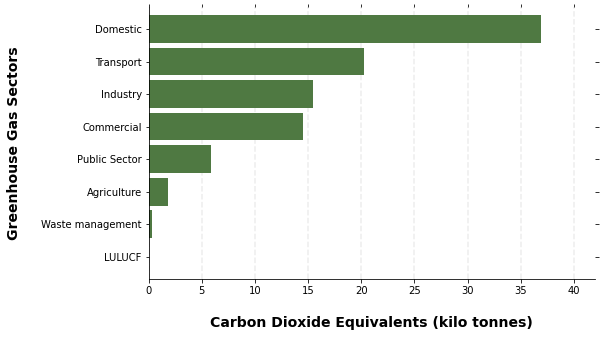

In [8]:
from matplotlib.ticker import StrMethodFormatter

ax = x.plot(kind='barh', figsize=(8, 5), color='#4F7942', zorder=2, width=0.85)

# Making borders visible 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)


ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# drawing vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#d3d3d3', zorder=1)

# Naming x-axis label
ax.set_xlabel("Carbon Dioxide Equivalents (kilo tonnes)", labelpad=20, weight='bold', size=14)

# Naming y-axis label
ax.set_ylabel("Greenhouse Gas Sectors", labelpad=20, weight='bold', size=14)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

Looking at the breakdown of greenhouse gases by sector is essential for regions to understand which sector has the largest impact. In this chart, 

In [ ]:
fig=px.sunburst(
    data_frame=gd,
    path=['Greenhouse gas','LA GHG Sector','LA GHG Sub-sector'],
    values = 'CO2 emissions within the scope of influence of LAs (kt CO2e)', color='LA GHG Sector',
    title = 'UK EMITTING SECTORS & SUBSECTORS (2005-2020)',
    height= 800, color_continuous_scale={'Transport':'red', 'Domestic':'black','Agriculture':'gold', 'Commercial':'green','Industry':'pink', 'Public Sector':'darkblue'})
fig.show()

In [ ]:
gd.groupby(['LA GHG Sector', 'LA GHG Sub-sector']).size().unstack().plot(kind='bar', stacked=True)

_Domestic_:
From 2005 to 2020, the largest contributing sector was domestic, accounting to _% of carbon dioxide equivalent emissions and _ kilo tonnes. Electricity generation and gas are both sources within the domestic sector. In 2019, 63% of domestic emissions arose from gas use, 23% from electricity and 11% from coal, causing it to be the greatest contributor to emissions in that year. However, the emissions produced in 2019 were significantly less than the emissions produced in 2018, due to a slight decrease in electricity demand, and the shift from coal to renewable and natural gas. The consumption of gas and electricity within homes are influenced by a range of factors, including fuel types, insulation, average temperature, house size, type of house, income and preferences of people. As population and area increase, the domestic sector will produce more releases.


_Transportation (c02e)_:
The transportation sector generates the second largest share of greenhouse gas emissions, having the highest reliance on fossil fuels of any sectors and accounts for _% of Carbon dioxide emissions. The sector includes the movement of passengers and cargo by cars, trains, ships, airplanes and trucks. Most of the fuel used for transportation is petroleum based, including primarily gasoline and diesel, emitting high productions of carbon dioxide as a result. The demand for transportation is expected to grow in the UK as population (mid population) increases, incomes rise and more people are able to afford cars, trains and flights. The estimations on the transport sector records the distribution of traffic and how that emits co2e. In 2019, there was a decrease of 1.8% productions of carbon dioxide equivalents compared to 2018. Since 2005, the transport emissions have gradually decreased due to lower petrol consumption and improvements in fuel efficiencies.  


_Agriculture_:
From 2005 to 2020, the total emissions from the agriculture sector were 113,847 kilo tonnes, resulting in one of the lowest emitting sector, contributing to 13.37% of overall carbon dioxide equivalent productions in local regions of the UK. Agriculture activities include the production of livestock, crop, soil and rice, they contribute to emissions in various different ways. 


`CO2e emissions within the scope of influence of LAs (kt CO2e)`

What is CO2e?

The measurement of all greenhouse gases are quantified together in one single metric called Carbon dioxide equivalent (CO2e) to compare emissions from different greenhouse gases on the basis of their GWP. C02e expresses the warming effect of different greenhouse gases as an equivalent amount of carbon dioxide. It is the amount of carbon dioxide that would give the same warming effect as each greenhouse gas that is emitted or stored by a sector/activity. Carbon dioxide equivalents are continuous data, measured in kilo tonnes (kl). The quantity of CO2e is expressed by multiplying the amount of GHG by their GWP. 
e.g. 1 kg of methane is emitted, 25kg of c02e  (1kg CH4 * 25 = 25kg CO2e).

C02 emissions had a 3.9% decline during 2018 to 2019, this decrease was the result of decreased fuel  and coal production and more use of renewable energy. However, in 2019, 36% of CO2 emissions were attributed to the transport sector, 27% to the domestic sector, 24& to the industrial sector, 9% to commercial and 4% to the public sector. The transport segment held the highest contribution in almost 63% of the local and regional authorities.

The figure ‘Carbon dioxide emissions by region’ displays each region of the UK highlighting an steady fall of carbon dioxide emissions from 2005 to 2019. As the years progress, Northern Ireland reduced about 23% of co2 emissions, with the first heavy decline in 2009 and a shallow line towards 2019. This shows that the gradual decrease of carbon dioxide emissions over the years, it was due to industrial closures. The figure shows that in 2011, the emissions by region kept decreasing, presenting a fall of 35% in Scotland  and 36% fall in England.

`Mid-year Population (thousands) `

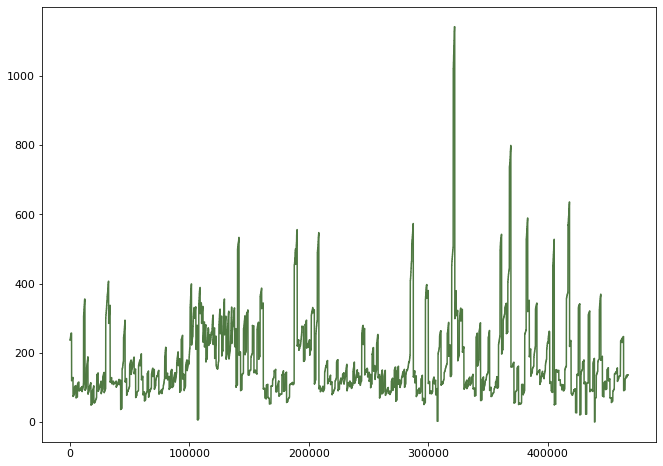

In [9]:
afx = gd['Mid-year Population (thousands)'].plot(color='#4F7942', figsize=(11,8), fontsize=11, zorder=2)

`Area (km2) `